##Data Preprocessing



###Loading Data

A modifier selon l'installation sur le drive

In [ ]:
!unzip /content/drive/MyDrive/Projets-M2/PSTALN/covid2topic-master.zip

Archive:  /content/drive/MyDrive/Projets-M2/PSTALN/covid2topic-master.zip
82f7b2933fbf6ae1b3b3c67af6b7391b4c278011
   creating: covid2topic-master/
 extracting: covid2topic-master/.gitignore  
  inflating: covid2topic-master/CNN_RNN.ipynb  
  inflating: covid2topic-master/bibliovid.csv  
  inflating: covid2topic-master/bibliovid_en_translated_lowered_cleaned.csv  
   creating: covid2topic-master/notebooks/
  inflating: covid2topic-master/notebooks/covidBERT_experimentations.ipynb  
  inflating: covid2topic-master/notebooks/covidBERT_litcovid_tuning.ipynb  
  inflating: covid2topic-master/prepare_csv.py  
   creating: covid2topic-master/researches_pdf/
  inflating: covid2topic-master/researches_pdf/BioBERT.pdf  
  inflating: covid2topic-master/researches_pdf/DocBERT.pdf  
  inflating: covid2topic-master/researches_pdf/covid.txt  
   creating: covid2topic-master/scripts_litcovid/
   creating: covid2topic-master/scripts_litcovid/__pycache__/
  inflating: covid2topic-master/scripts_litcovi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, recall_score

import nltk
from nltk.corpus import stopwords


repo_path = "/content/covid2topic-master/"

In [ ]:
bibliovid = pd.read_csv(repo_path + "bibliovid.csv")
bibliovid = bibliovid[bibliovid['synthesis'].notnull() & bibliovid['goals'].notnull()]
bibliovid.head()

Unnamed: 0  ...    set
0           0  ...   test
1           1  ...   test
2           2  ...   test
3           3  ...   test
4           4  ...  train

[5 rows x 7 columns]

In [ ]:
texts = bibliovid['synthesis'] + " <split> " + bibliovid['goals']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from ast import literal_eval
import regex

bibliovid['topics'] = bibliovid['topics'].apply(literal_eval)
topics = np.unique([topic for topics in bibliovid['topics'] for topic in topics])
mlb = MultiLabelBinarizer()
mlb.fit([topics])
n_labels = len(mlb.classes_)
print(n_labels, "classes.\n")

labels = bibliovid['topics']
labels_ids = mlb.transform(bibliovid['topics'])
sets = bibliovid['set']

print(texts[0])
print(labels[0])
print(labels_ids[0])
print(sets[0] + '\n')

26 classes.

- Environ 2-3% des patients atteints de la COVID 19 requièrent une ventilation mécanique et la mortalité globale liée à la COVID 19 est comprise entre 0.4 et 1.4% - L'obésité est un facteur de risque de pneumonie et de syndrome de détresse respiratoire aiguë (SDRA) mais à contrario elle est associée à une mortalité plus faible due à la pneumonie et au SDRA - Les patients obèses ont un risque plus élevé de forme grave de COVID 19 ( Intubation et/ou décès) et ce particulièrement chez les patients de moins de 65 ans <split> - Déterminer si l'obésité est associée à l'intubation ou le décès au cours de l'infection au SARS-CoV-2 - Déterminer si l'obésité est associée à l'inflammation , aux lésions cardiaques ou à la fibrinolyse dans la COVID-19
['Pronostique', 'Anesthésie-Réanimation', 'Infectiologie']
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
test



###Text Cleanup

In [ ]:
nltk.download('stopwords')
sw = stopwords.words("french")

# Remove special characters and articles which do not have any text from the dataset
text_cleaned = [regex.sub('\"|\'|\(|\)|\.', ' ', text) for text in texts if isinstance(text, str)]

text_split = [text.split() for text in text_cleaned]

# Making all words lowercase
text_split_lower = [[word.lower() for word in text if regex.search(r'(\p{Ll}|\d)', word.lower())] for text in text_split]

# Removing stopwords
text_split_nsw = [[word for word in text if not word in sw] for text in text_split_lower]

text_len = [len(text) for text in text_split]
text_len_nsw = [len(text) for text in text_split_nsw]

print(text_split[0])
print(text_split_nsw[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['-', 'Environ', '2-3%', 'des', 'patients', 'atteints', 'de', 'la', 'COVID', '19', 'requièrent', 'une', 'ventilation', 'mécanique', 'et', 'la', 'mortalité', 'globale', 'liée', 'à', 'la', 'COVID', '19', 'est', 'comprise', 'entre', '0', '4', 'et', '1', '4%', '-', 'L', 'obésité', 'est', 'un', 'facteur', 'de', 'risque', 'de', 'pneumonie', 'et', 'de', 'syndrome', 'de', 'détresse', 'respiratoire', 'aiguë', 'SDRA', 'mais', 'à', 'contrario', 'elle', 'est', 'associée', 'à', 'une', 'mortalité', 'plus', 'faible', 'due', 'à', 'la', 'pneumonie', 'et', 'au', 'SDRA', '-', 'Les', 'patients', 'obèses', 'ont', 'un', 'risque', 'plus', 'élevé', 'de', 'forme', 'grave', 'de', 'COVID', '19', 'Intubation', 'et/ou', 'décès', 'et', 'ce', 'particulièrement', 'chez', 'les', 'patients', 'de', 'moins', 'de', '65', 'ans', '<split>', '-', 'Déterminer', 'si', 'l', 'obésité', 'est', 'associée', 'à', 'l

Average words per text (base) : 97.0576070901034
Maximum text length (base) : 513

Average words per text (no stopwords) : 56.87592319054653
Maximum text length (no stopwords) : 292


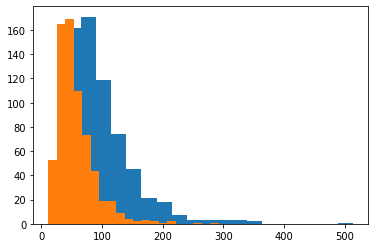

In [ ]:
plt.hist(text_len, bins=20)
plt.hist(text_len_nsw, bins=20)

print("Average words per text (base) :", np.mean(text_len))
print("Maximum text length (base) :", np.max(text_len))

print("\nAverage words per text (no stopwords) :", np.mean(text_len_nsw))
print("Maximum text length (no stopwords) :", np.max(text_len_nsw))

In [ ]:
import collections
vocab = collections.defaultdict(lambda: len(vocab))
vocab['<eos>'] = 0

texts_nsw = [' '.join(text) for text in text_split_nsw]

int_texts = []
for text in texts_nsw:
    int_texts.append([vocab[token] for token in text.split()])

print("Vocabulary length =", len(vocab))
print(int_texts[10])
print(texts_nsw[10])

Vocabulary length = 7965
[252, 71, 409, 548, 549, 550, 551, 550, 552, 71, 218, 553, 554, 71, 254, 548, 555, 69, 91, 556, 557, 458, 558, 559, 560, 561, 118, 119, 337, 562, 563, 17, 57, 45, 564, 252, 71, 409, 333, 565, 566, 567, 568, 252, 569, 570]
distribution nombre cas secondaires semble très surdispersée très petit nombre infectés responsable grand nombre infections secondaires ainsi, contrôler épidémie, éviter situations pouvant donner lieu événements super-spreading peut être efficace commentaires version 1 article <split> estimer distribution nombre cas secondaires, particulier sur-dispersion paramètre k distribution binomiale négative


###Setting up the data

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

if torch.cuda.is_available():  
  device = "cuda:0" 
else:  
  device = "cpu" 

print(device)

max_len = 75
batch_size = 8

cuda:0


In [ ]:
train_size = np.count_nonzero(sets == "train")
test_size = np.count_nonzero(sets == "test")

X_train = torch.zeros(train_size, max_len).long()
X_test = torch.zeros(test_size, max_len).long()

y_train = torch.empty(train_size, n_labels).long()
y_test = torch.empty(test_size, n_labels).long()

i_train = 0
i_test = 0
for text, labels, sample_set in zip(int_texts, labels_ids, sets):
  length = min(max_len, len(text))
  if sample_set == "train":
    X_train[i_train,:length] = torch.LongTensor(text[:length])
    y_train[i_train] = torch.LongTensor(labels)
    i_train += 1
  elif sample_set == "test":
    X_test[i_test,:length] = torch.LongTensor(text[:length])
    y_test[i_test] = torch.LongTensor(labels)
    i_test += 1
  else:
    print("Bad sample set name \'", sample_set, "\'.")
    break

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size)

print(len(X_train), "train samples")
print(len(X_test), "test samples")

406 train samples
271 test samples


##Building a Model

In [ ]:
embed_size = 128
hidden_size = 128

In [ ]:
from sklearn.preprocessing import MinMaxScaler


def get_pos_weights(labels_ids):
  train_labels = torch.FloatTensor(labels_ids)
  frequencies = torch.mean(train_labels, dim=0)
  negative_frequencies = torch.subtract(torch.ones((1, n_labels)), frequencies)
  pos_weight = torch.divide(negative_frequencies,frequencies)
  # pos_weight = torch.clamp(pos_weight, min=torch.min(pos_weight).item(), max=30)
  pos_weight = pos_weight.to(device)
  return pos_weight

pos = get_pos_weights(labels_ids)
print(pos)

tensor([[  6.2796,   6.2796,   9.9194,  38.8235, 168.2500,   7.9079,   1.9435,
          29.7727, 134.4000,  15.5122,  95.7143,  51.0769,  36.6111,   2.2238,
          17.2973,  34.6316, 134.4000,  10.8772,   7.0595,  32.8500,  15.5122,
          20.1562,  60.5455,   3.6370,   1.3671,   8.5352]], device='cuda:0')


In [ ]:
def get_predictions(probas, threshold=0.5):
  outputs = torch.sigmoid(probas)
  outputs[outputs >= threshold] = 1
  outputs[outputs < threshold] = 0
  return outputs

def multilabel_accuracy(y_true, y_pred):
  a = y_true.cpu().detach().numpy()
  b = get_predictions(y_pred).cpu().detach().numpy()
  return f1_score(a, b, average='weighted'), accuracy_score(a, b), recall_score(a, b, average='weighted')

In [ ]:
def perf(model, loader):
    pos_weight = get_pos_weights(labels_ids=labels_ids)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    model.eval()
    total_loss = correct = num = 0
    total_scores = []
    total_acc = []
    total_recall = []
    for x, y in loader:
      with torch.no_grad():
        y_scores = model(x)
        loss = criterion(y_scores, y.type_as(y_scores))
        total_loss += loss.item()
        num += len(y)
        f1, acc, recall = multilabel_accuracy(y, y_scores)
        total_scores.append(f1)
        total_acc.append(acc)
        total_recall.append(recall)
    return total_loss / num, np.mean(total_scores), np.mean(total_acc), np.mean(total_recall)


In [ ]:
def fit(model, epochs, train_loader, val_loader=None, display_step=5):
    pos_weight = get_pos_weights(labels_ids=labels_ids)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = optim.Adam(model.parameters())
    for epoch in range(epochs):
        model.train()
        total_loss = val_loss = num = 0
        total_scores = []
        for x, y in train_loader:
            optimizer.zero_grad()
            y_scores = model(x)
            loss = criterion(y_scores, y.type_as(y_scores))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            num += len(y)
            score = multilabel_accuracy(y, y_scores)
            total_scores.append(score)
        if (epoch+1)%display_step == 0 or epoch == epochs-1 or epoch == 0:
          if val_loader != None:
            l, val_f1, val_acc, val_recall = perf(model, val_loader)
            val_loss += l
            print(epoch + 1, "\t train loss :", f"{(total_loss / num):.5f}", "\t train f1 :", f"{np.mean(total_scores):.8f}", "\t val loss :", f"{val_loss / num:.5f}", "\t val f1 :", f"{val_f1:.8f}", "\t val acc :", f"{val_acc:.8f}", "\t val rec :", f"{val_recall:.8f}")
          else:
            print(epoch + 1, "\t train loss :", f"{(total_loss / num):.5f}", "\t train f1 :", f"{np.mean(total_scores):.8f}")

###Models


In [ ]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(len(vocab), embed_size)
        self.rnn = nn.GRU(embed_size, hidden_size, num_layers=1, bidirectional=False, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.decision = nn.Linear(hidden_size * 1 * 1, n_labels)
        
    def forward(self, x):
        embed = self.embed(x)
        output, hidden = self.rnn(embed)
        drop = self.dropout(hidden)
        out = self.decision(drop.transpose(0, 1).contiguous().view(x.size(0), -1))
        return out

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(len(vocab), embed_size)
        self.conv = nn.Conv1d(embed_size, hidden_size, kernel_size=2)
        self.dropout = nn.Dropout(0.5)
        self.decision = nn.Linear(embed_size, n_labels)

    def forward(self, x):
        embed = self.embed(x)
        conv = F.relu(self.conv(embed.transpose(1,2)))
        pool = F.max_pool1d(conv, conv.size(2))
        drop = self.dropout(pool)
        return self.decision(drop.view(x.size(0), -1))

In [ ]:
class RNN_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(len(vocab), embed_size)
        self.rnn = nn.GRU(embed_size, hidden_size, num_layers=3, bidirectional=False, batch_first=True)
        self.conv = nn.Conv1d(hidden_size, hidden_size, kernel_size=2)
        self.dropout = nn.Dropout(.5)
        self.decision = nn.Linear(hidden_size, n_labels)

    def forward(self, x):
        embed = self.embed(x)
        output, hidden = self.rnn(embed)
        conv = F.relu(self.conv(output.transpose(1,2)))
        pool = F.max_pool1d(conv, conv.size(2))
        drop = self.dropout(pool)
        decision = self.decision(drop.view(x.size(0), -1))
        return decision

###Apprentissage

In [ ]:
rnn_model = RNN()
rnn_model.to(device)

fit(rnn_model, 60, train_loader, test_loader, display_step=5)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


1 	 train loss : 0.15671 	 train f1 : 0.27336281 	 val loss : 0.00042 	 val f1 : 0.34754486 	 val acc : 0.00000000 	 val rec : 0.54814886
5 	 train loss : 0.14719 	 train f1 : 0.29963700 	 val loss : 0.00044 	 val f1 : 0.26747268 	 val acc : 0.00000000 	 val rec : 0.46214161
10 	 train loss : 0.14141 	 train f1 : 0.34208714 	 val loss : 0.00048 	 val f1 : 0.35964689 	 val acc : 0.00000000 	 val rec : 0.57467392
15 	 train loss : 0.12732 	 train f1 : 0.37696478 	 val loss : 0.00047 	 val f1 : 0.36529584 	 val acc : 0.00000000 	 val rec : 0.52777932
20 	 train loss : 0.10176 	 train f1 : 0.46648088 	 val loss : 0.00050 	 val f1 : 0.42252059 	 val acc : 0.00000000 	 val rec : 0.58094029
25 	 train loss : 0.07691 	 train f1 : 0.49228744 	 val loss : 0.00061 	 val f1 : 0.39880901 	 val acc : 0.00000000 	 val rec : 0.50138428
30 	 train loss : 0.06498 	 train f1 : 0.52512200 	 val loss : 0.00068 	 val f1 : 0.38676844 	 val acc : 0.00367647 	 val rec : 0.48584817
35 	 train loss : 0.05515 	 t

In [ ]:
cnn_model = CNN()
cnn_model.to(device)

fit(cnn_model, 60, train_loader, test_loader, display_step=5)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1 	 train loss : 0.18109 	 train f1 : 0.26584860 	 val loss : 0.00045 	 val f1 : 0.23502069 	 val acc : 0.00000000 	 val rec : 0.38152835
5 	 train loss : 0.14060 	 train f1 : 0.31124797 	 val loss : 0.00043 	 val f1 : 0.28074589 	 val acc : 0.00000000 	 val rec : 0.41081740
10 	 train loss : 0.13436 	 train f1 : 0.33024380 	 val loss : 0.00043 	 val f1 : 0.33040558 	 val acc : 0.00000000 	 val rec : 0.46422998
15 	 train loss : 0.11761 	 train f1 : 0.36212442 	 val loss : 0.00044 	 val f1 : 0.34242133 	 val acc : 0.00000000 	 val rec : 0.46735355
20 	 train loss : 0.10876 	 train f1 : 0.37749403 	 val loss : 0.00045 	 val f1 : 0.30108427 	 val acc : 0.01470588 	 val rec : 0.33903989
25 	 train loss : 0.09523 	 train f1 : 0.40799707 	 val loss : 0.00048 	 val f1 : 0.28549474 	 val acc : 0.01102941 	 val rec : 0.34389960
30 	 train loss : 0.08456 	 train f1 : 0.43384292 	 val loss : 0.00052 	 val f1 : 0.34685806 	 val acc : 0.02941176 	 val rec : 0.41276404
35 	 train loss : 0.08169 	 t

In [ ]:
rnn_cnn_model = RNN_CNN()
rnn_cnn_model.to(device)

fit(rnn_cnn_model, 60, train_loader, test_loader, display_step=5)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1 	 train loss : 0.15538 	 train f1 : 0.25572348 	 val loss : 0.00041 	 val f1 : 0.21651321 	 val acc : 0.00000000 	 val rec : 0.44357134
5 	 train loss : 0.14106 	 train f1 : 0.35566891 	 val loss : 0.00044 	 val f1 : 0.37291712 	 val acc : 0.00000000 	 val rec : 0.55017919
10 	 train loss : 0.11526 	 train f1 : 0.37072751 	 val loss : 0.00067 	 val f1 : 0.40477314 	 val acc : 0.00000000 	 val rec : 0.54342429
15 	 train loss : 0.08132 	 train f1 : 0.44146973 	 val loss : 0.00096 	 val f1 : 0.38639349 	 val acc : 0.00000000 	 val rec : 0.45587518
20 	 train loss : 0.06109 	 train f1 : 0.48745183 	 val loss : 0.00140 	 val f1 : 0.38422808 	 val acc : 0.01838235 	 val rec : 0.44764775
25 	 train loss : 0.05102 	 train f1 : 0.51286863 	 val loss : 0.00169 	 val f1 : 0.38851947 	 val acc : 0.01102941 	 val rec : 0.44272014
30 	 train loss : 0.04449 	 train f1 : 0.54722506 	 val loss : 0.00197 	 val f1 : 0.35704167 	 val acc : 0.02941176 	 val rec : 0.40010715
35 	 train loss : 0.04645 	 t

In [ ]:
perf(rnn_model, test_loader)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.40490490813976726,
 0.35170960101131704,
 0.029411764705882353,
 0.384967930210313)

In [ ]:
u = rnn_cnn_model(y_test)
p = get_predictions(rnn_cnn_model(y_test))

print(len(p))
print(torch.sum(p, 0))
print(torch.sum(y_test, 0))

271
tensor([  0., 271.,   0.,  40.,   0., 270.,   0., 197., 271., 271.,   1., 271.,
          0.,   0., 271.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0., 270.], device='cuda:0', grad_fn=<SumBackward1>)
tensor([ 40,  36,  23,  11,   1,  30,  99,   9,   0,  16,   5,   7,   7,  73,
         16,   7,   3,  27,  27,   9,  17,  15,   7,  56, 113,  23],
       device='cuda:0')
